In [1]:
import numpy as np
import torch
from pathlib import Path
from pyro.distributions import Normal
import os
from bnn_priors.models import DenseNet
from bnn_priors.inference import SGLD
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
data = np.load("../data/snelson.npz")

model = DenseNet(1,1,32)

x_train = torch.from_numpy(data['x_train']).unsqueeze(1).to(model.lin1.weight)
y_train = torch.from_numpy(data['y_train']).unsqueeze(1).to(x_train)

x_test = torch.from_numpy(data['x_test']).unsqueeze(1).to(x_train)

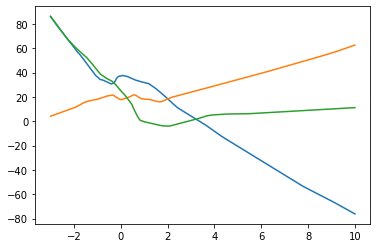

In [3]:
with torch.no_grad():
    model.sample_all_priors()
    y = model(x_test)
    plt.plot(x_test, y)

    model.sample_all_priors()
    y = model(x_test)
    plt.plot(x_test, y)

    model.sample_all_priors()
    y = model(x_test)
    plt.plot(x_test, y)

    plt.show()

In [4]:
N_steps = 1000 # 100
warmup = 2000 # 50

model = DenseNet(1,1,32)

sgld = SGLD(model=model, num_samples=N_steps, warmup_steps=warmup, learning_rate=1e-4)
sgld.run(x=x_train, y=y_train)

samples = sgld.get_samples()

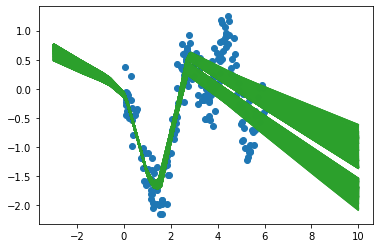

In [5]:
for i in range(N_steps):
    param_sample = {param : value[i] for param, value in samples.items()}
    model.load_state_dict(param_sample)
    with torch.no_grad():
        plt.plot(x_test, model(x_test), color="C2", alpha=0.7)
plt.scatter(x_train, y_train)
plt.show()